In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree  import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression  ,Ridge ,SGDRegressor
from sklearn.ensemble import RandomForestRegressor

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Loading the Data
Fare = pd.read_csv("uber.csv", index_col=0)

# Understanding the data

In [3]:
Fare.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
Fare.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [5]:
Fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 24238194 to 11951496
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [6]:
Fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
Fare.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
Fare = Fare.dropna()

In [9]:
Fare.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
Fare.duplicated().sum()

0

In [11]:
#Selecting the required columns 
Fare = Fare[['fare_amount','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]

In [12]:
Fare.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Feature Engineering

In [13]:
#Changing the data type of pickup_date to date from object
Fare['pickup_datetime'] = pd.to_datetime(Fare['pickup_datetime'], utc = True)

In [14]:
Fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [15]:
# Dividing the date in different part like weekday, day, month, year, hour of the day
Fare['Weekdays'] = Fare['pickup_datetime'].dt.weekday
Fare['Date'] = Fare['pickup_datetime'].dt.date
Fare['Month'] = Fare['pickup_datetime'].dt.month
Fare['Year'] = Fare['pickup_datetime'].dt.year
Fare['Hour_of_day'] = Fare['pickup_datetime'].dt.hour


In [16]:
def hour_of_day(x) :
    if x <= 18 and x>=5 :
        return "Day" 
    else :
        return "Night" 
Fare.Hour_of_day = Fare.Hour_of_day.apply(hour_of_day)

In [17]:
Fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Weekdays,Date,Month,Year,Hour_of_day
24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,3,2015-05-07,5,2015,Night
27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,4,2009-07-17,7,2009,Night
44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,2009-08-24,8,2009,Night
25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,4,2009-06-26,6,2009,Day
17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,3,2014-08-28,8,2014,Day


In [18]:
Fare = Fare[['Date', 'Month', 'Year', 'Hour_of_day','Weekdays','fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]

In [19]:
Fare.head()

,Date,Month,Year,Hour_of_day,Weekdays,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07,5,2015,Night,3,7.5,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17,7,2009,Night,4,7.7,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24,8,2009,Night,0,12.9,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26,6,2009,Day,4,5.3,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28,8,2014,Day,3,16.0,-73.925023,40.744085,-73.973082,40.761247,5


# Cleaning Data

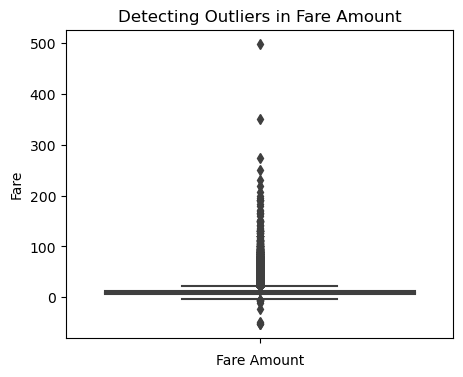

In [20]:
#Lets Find out the outliers

plt.figure(figsize=(5,4))
sns.boxplot(y = 'fare_amount', data=Fare)
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Detecting Outliers in Fare Amount')
plt.show()

In [21]:
#Remove outliers
Q1 = Fare['fare_amount'].quantile(0.25)
Q3 = Fare['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Identify outliers
outliers = Fare[(Fare['fare_amount'] < lb) | (Fare['fare_amount'] > ub)]

# Remove outliers
Fare = Fare[(Fare['fare_amount'] >= lb) & (Fare['fare_amount'] <= ub)]

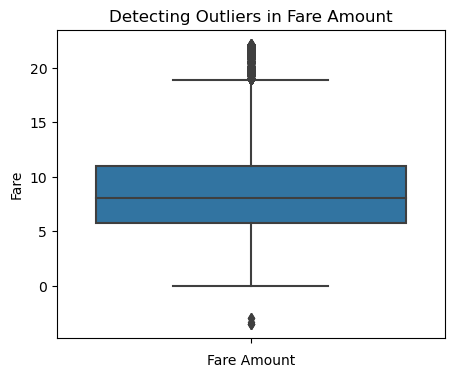

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(y = 'fare_amount', data=Fare)
plt.xlabel('Fare Amount')
plt.ylabel('Fare')
plt.title('Detecting Outliers in Fare Amount')
plt.show()

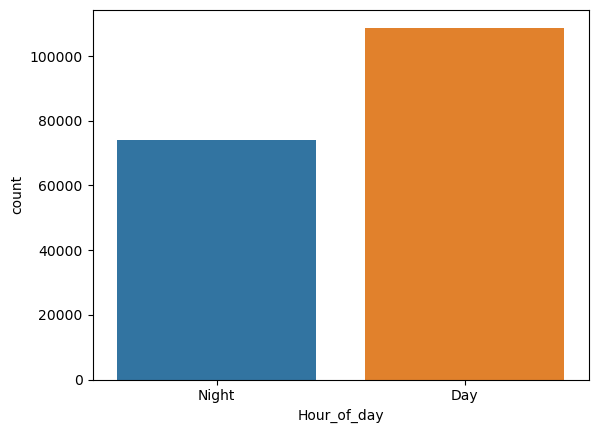

In [23]:
#Univariate analysis
#Number of rides booken according to the time of the day
sns.countplot(data = Fare,x="Hour_of_day")
plt.show()

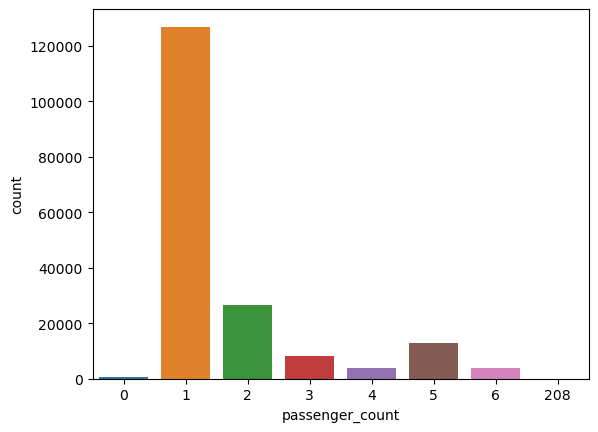

In [24]:
#Plotting the graph to check what is the number of passengers in most of the people booked rides for.
sns.countplot(data = Fare,x="passenger_count")
plt.show()

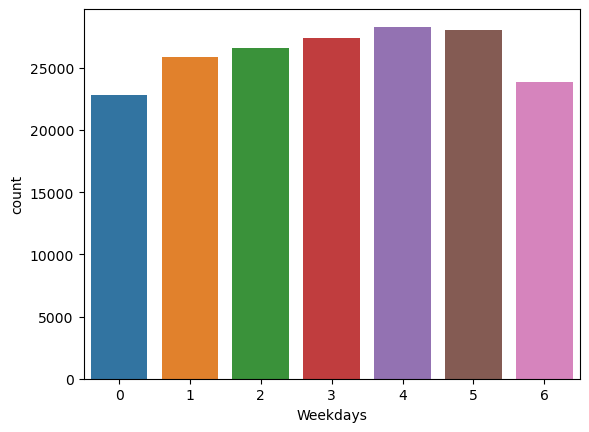

In [25]:
#Plotting the graph to check if there is a significant difference in booking of rides according to the weekday 
sns.countplot(data = Fare, x='Weekdays')
plt.show()

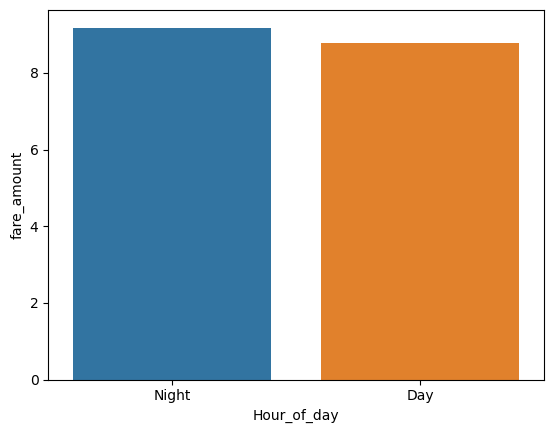

In [26]:
#Plotting the graph to check if there is a significant difference in fare amount according to the time of the day the ride is booked 
sns.barplot(x=Fare['Hour_of_day'],y=Fare['fare_amount'],ci = None)
plt.show()

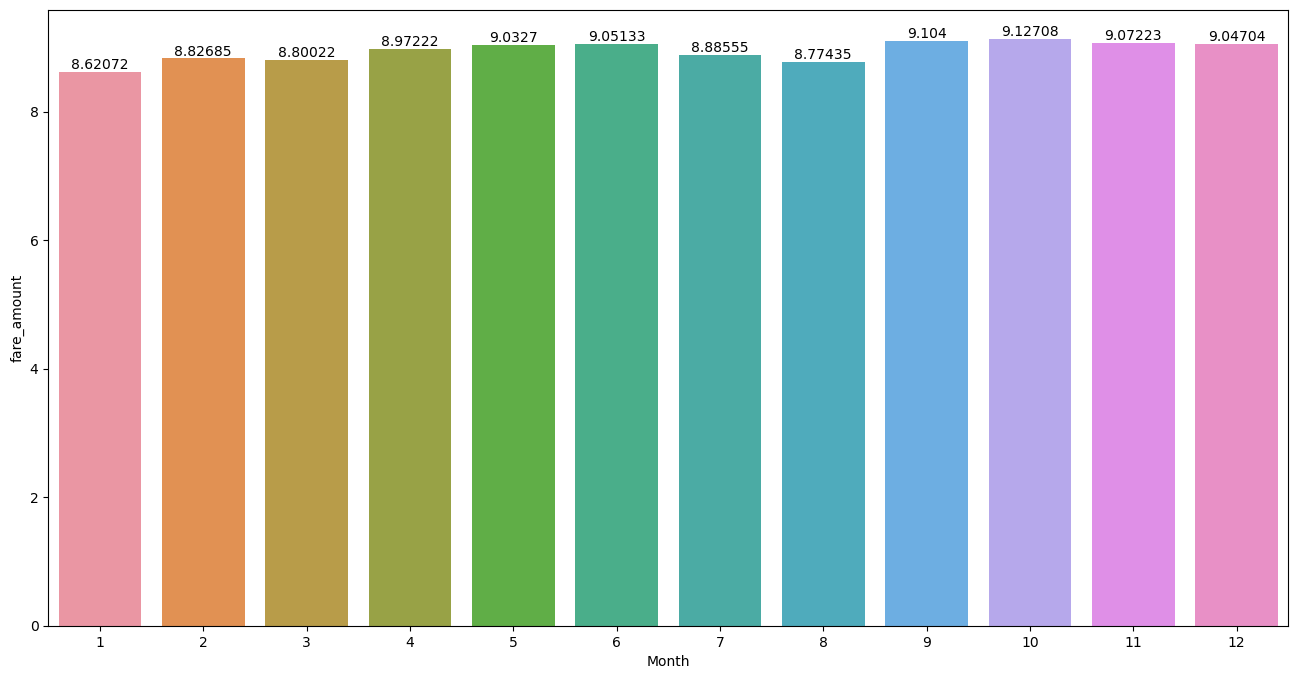

In [27]:
#Plotting the graph to check if there is a significant difference in fare amount according to the Month
plt.figure(figsize=(16,8))
figure = sns.barplot(x=Fare['Month'],y=Fare['fare_amount'],ci = None)
for contain in figure.containers :
    figure.bar_label(contain)
plt.show()

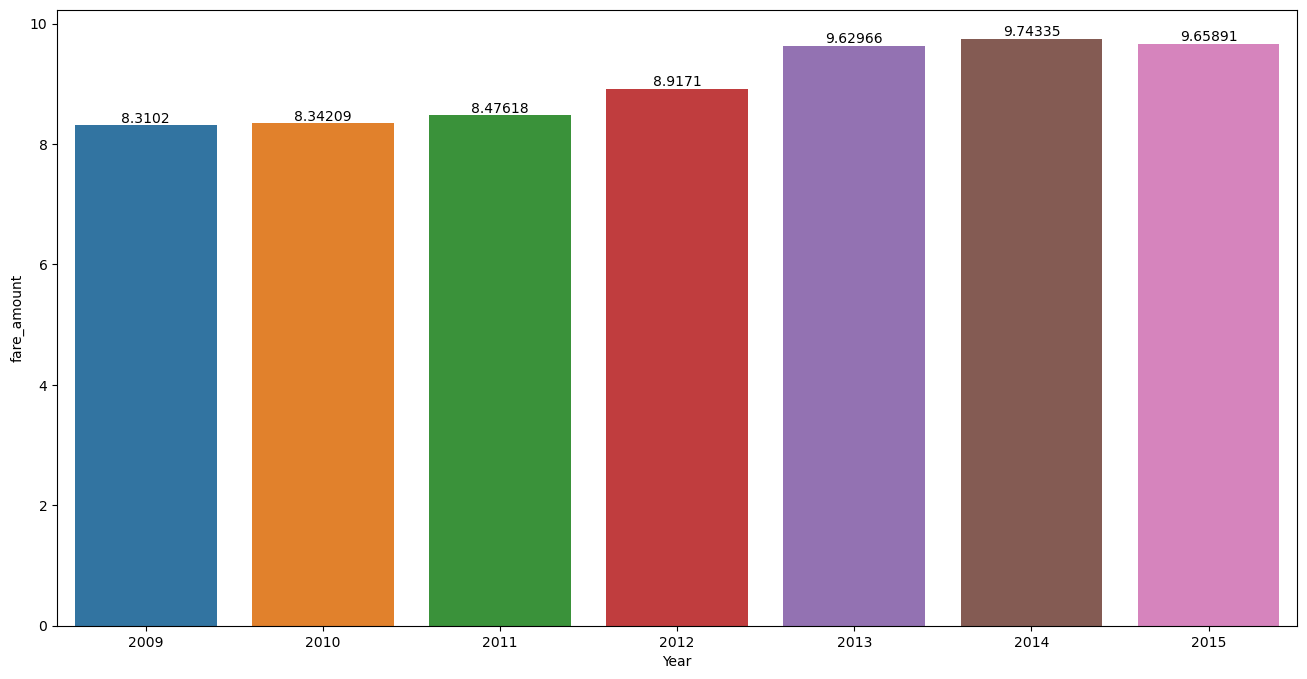

In [28]:
#Plotting the graph to check if there is a significant difference in fare amount according to the year
plt.figure(figsize=(16,8))
figure = sns.barplot(x=Fare['Year'],y=Fare['fare_amount'],ci = None)
for contain in figure.containers :
    figure.bar_label(contain)
plt.show()

1) Though the trips taken is less at night time the fare is higher than day time.
2) On weekends the count of trips are bit lesser when compared to 5 weekdays.
3) The amount is not fluctuating much monthly and there is a clear raise in the fare amount in 2013.

In [29]:
# Split the data into test and train data
x = Fare.drop('fare_amount', axis = 1)
y = Fare['fare_amount']

In [30]:
Fare[Fare.isna()]

,Date,Month,Year,Hour_of_day,Weekdays,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27835199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44984355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25894730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17610152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3189201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42598914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16382965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20259894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Dividing the Dataset into nominal and numerica data according to the data type 
nom = Fare.select_dtypes("object").columns
num =Fare.select_dtypes("float64").columns

In [32]:
Fare.isna().sum()

Date                 0
Month                0
Year                 0
Hour_of_day          0
Weekdays             0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [33]:
corr = x.corr()

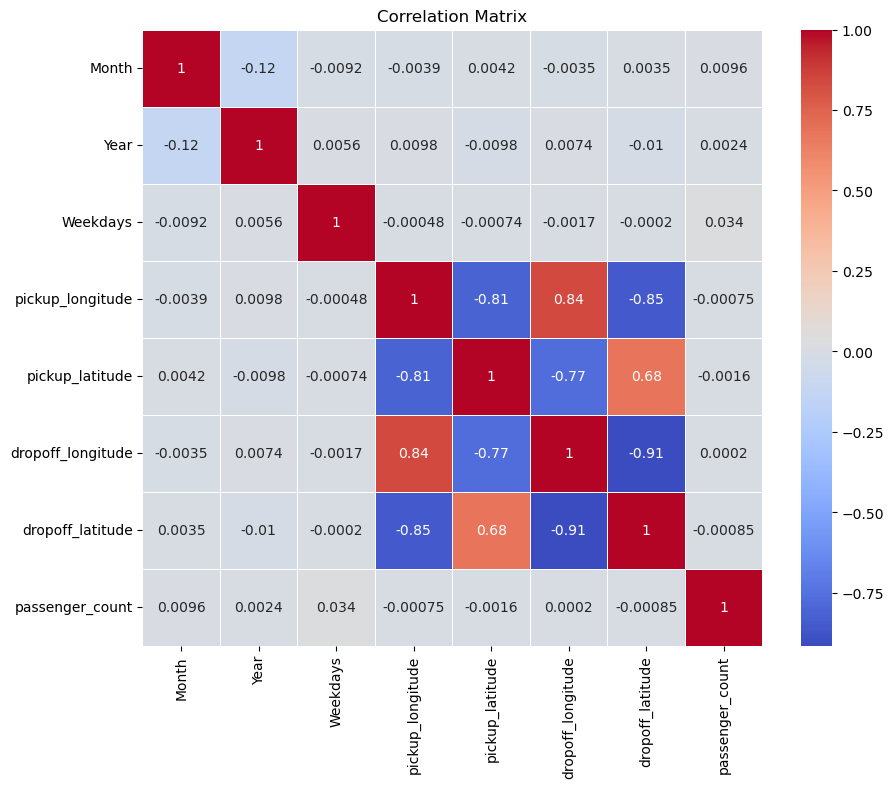

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 